## *Analiza incydentów cyberbezpieczeństwa z lat 2015–2024 z zastosowaniem metod eksploracji danych* 


### Cele projektu

Identyfikacja najczęstszych zagrożeń i ich źródeł – określenie, które typy ataków dominowały w analizowanym okresie i kto był za nie odpowiedzialny.

Analiza podatnych branż i krajów – zrozumienie, które sektory i regiony są najbardziej narażone na cyberataki.

Ocena skutków incydentów – analiza strat finansowych, liczby poszkodowanych użytkowników oraz czasu rozwiązania problemu.

Identyfikacja trendów w czasie – wykrycie zmian w intensywności i charakterze zagrożeń na przestrzeni lat.

Ocena efektywności mechanizmów obronnych – sprawdzenie, czy określone strategie zabezpieczeń korelują z niższymi stratami lub krótszym czasem reakcji.

### Wybór metody analitycznej

1. Klasteryzacja (K-średnich)
- Cel: grupowanie incydentów w klastry na podstawie ich skutków (straty finansowe, liczba poszkodowanych, czas rozwiązania).
- Umożliwia identyfikację typowych profili incydentów i ich intensywności.
- Może pomóc w odkryciu ukrytych wzorców, które nie są widoczne przy klasycznej analizie opisowej.
2. Drzewo regresyjne
- Cel: przewidywanie strat finansowych w zależności od cech incydentu (np. typ ataku, branża, zastosowany mechanizm obronny).
- Model pozwala zrozumieć, które czynniki najbardziej wpływają na wysokość strat.
- Jest łatwy do interpretacji i daje możliwość wizualizacji procesu decyzyjnego.


### Import bibliotek oraz załadowanie danych

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


### Opis danych

Zbiór danych przedstawia informacje o globalnych incydentach związanych z cyberbezpieczeństwem, zarejestrowanych w latach 2015–2024. Dane te mogą być pomocne w analizie zagrożeń, identyfikacji trendów oraz ocenie skuteczności mechanizmów obronnych stosowanych przez organizacje.

Każdy wiersz w zbiorze reprezentuje pojedynczy incydent i zawiera zestaw atrybutów opisujących kontekst zdarzenia, jego charakter, skalę oraz skutki. Dane mają charakter przekrojowy i obejmują zarówno zmienne kategoryczne, jak i liczbowe.  

Kolumny w zbiorze danych:
| Kolumna | Opis |
|---------|------|
| `Country` | Kraj, w którym odnotowano atak |
| `Year` | Rok incydentu |
| `Attack Type` | Rodzaj ataku (np. phishing, ransomware) |
| `Target Industry` | Branża będąca celem |
| `Financial Loss (in Million $)` | Straty finansowe w milionach dolarów |
| `Number of Affected Users` | Liczba użytkowników, których dotknął incydent |
| `Attack Source` | Kto stoi za atakiem (np. grupa hakerska, insider) |
| `Security Vulnerability Type` | Rodzaj wykorzystanej luki |
| `Defense Mechanism Used` | Zastosowane mechanizmy obronne |
| `Incident Resolution Time (in Hours)` | Czas rozwiązania incydentu |

### Eksploracyjna analiza danych

#### Podstawowe informacje

In [16]:
print("Typ obiektu:", type(df))

Typ obiektu: <class 'pandas.core.frame.DataFrame'>


In [6]:
print("Rozmiar zbioru:", df.shape)

Rozmiar zbioru: (3000, 10)


In [9]:
print("Typy danych:\n", df.dtypes)

Typy danych:
 Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object


In [11]:
print("Braki danych:\n", df.isnull().sum())

Braki danych:
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


#### Przegląd statystyczny danych liczbowych

In [19]:
print("Opis statystyczny:\n", df.describe())

Opis statystyczny:
               Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                              19.000000 

#### Najczęstsze wartości w zmiennych kategorycznych

In [20]:
kategoryczne = ['Country', 'Attack Type', 'Target Industry', 'Attack Source',
                'Security Vulnerability Type', 'Defense Mechanism Used']
for col in kategoryczne:
    print(f" {col} - Top 5:\n", df[col].value_counts().head())

 Country - Top 5:
 Country
UK        321
Brazil    310
India     308
Japan     305
France    305
Name: count, dtype: int64
 Attack Type - Top 5:
 Attack Type
DDoS             531
Phishing         529
SQL Injection    503
Ransomware       493
Malware          485
Name: count, dtype: int64
 Target Industry - Top 5:
 Target Industry
IT            478
Banking       445
Healthcare    429
Retail        423
Education     419
Name: count, dtype: int64
 Attack Source - Top 5:
 Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64
 Security Vulnerability Type - Top 5:
 Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64
 Defense Mechanism Used - Top 5:
 Defense Mechanism Used
Antivirus             628
VPN                   612
Encryption            592
Firewall              585
AI-based Detection    583
Name: count, dtype: int

#### Wykresy częstości dla zmiennych kategorycznych

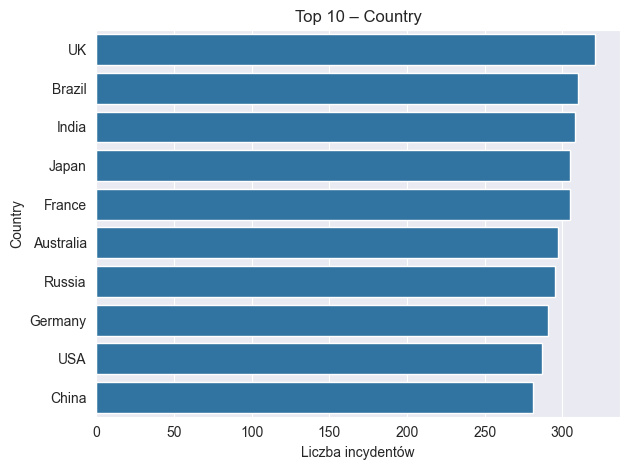

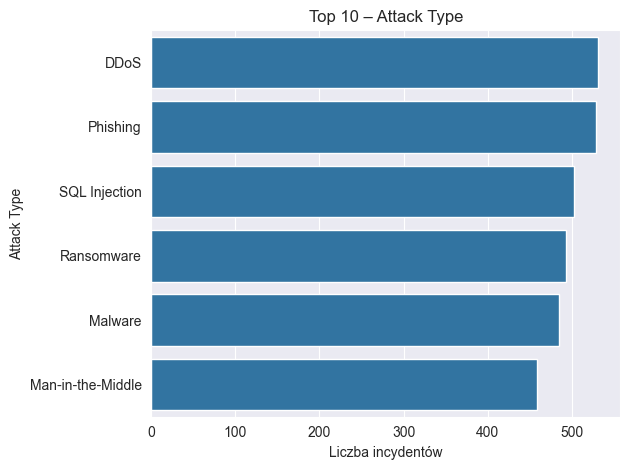

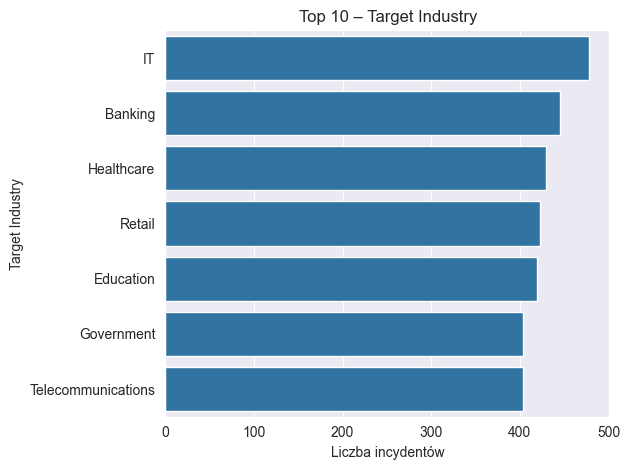

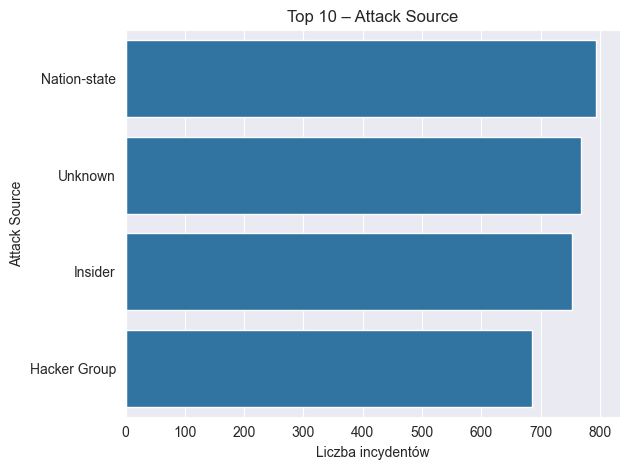

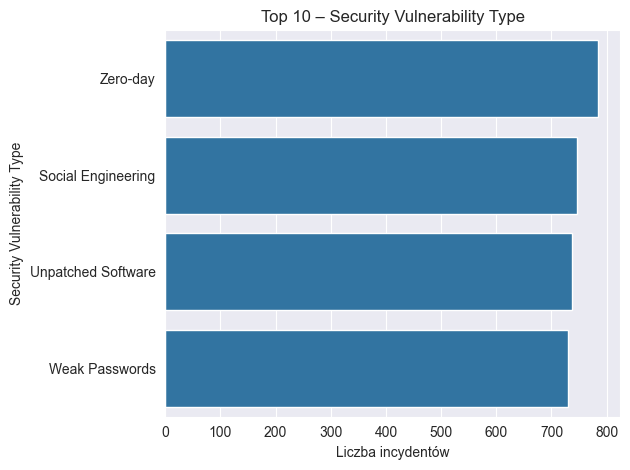

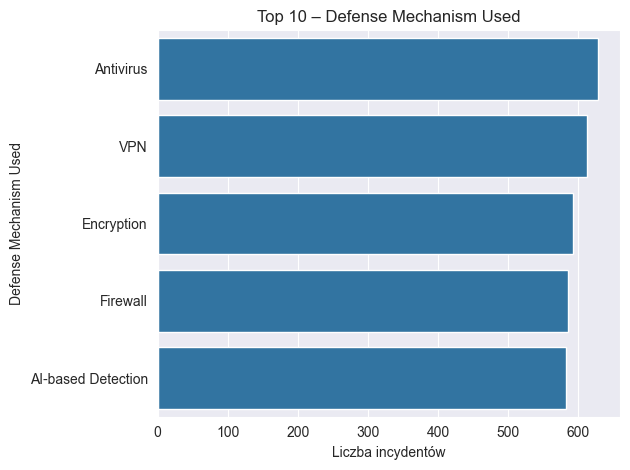

In [24]:
for col in kategoryczne:
    plt.figure()
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top 10 – {col}")
    plt.xlabel("Liczba incydentów")
    plt.tight_layout()
    plt.show()

#### Rozkład strat finansowych

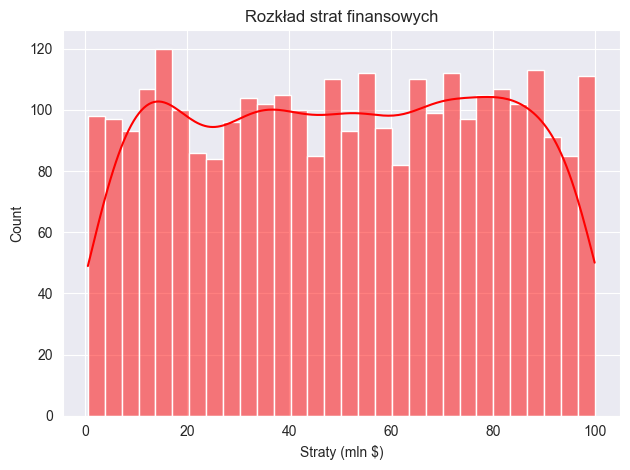

In [26]:
plt.figure()
sns.histplot(df['Financial Loss (in Million $)'], kde=True, bins=30, color='red')
plt.title("Rozkład strat finansowych")
plt.xlabel("Straty (mln $)")
plt.tight_layout()
plt.show()

#### Liczba dotkniętych użytkowników

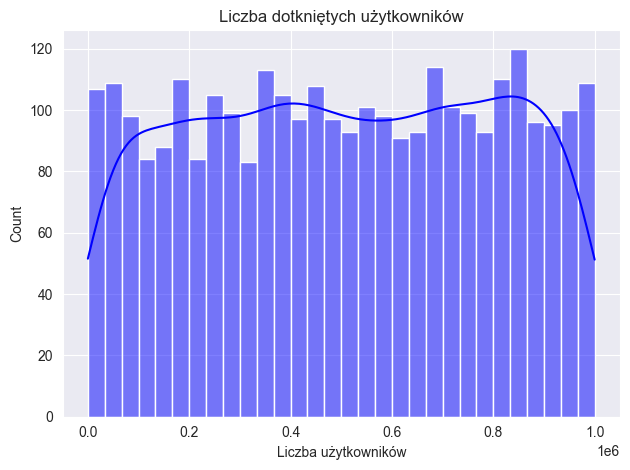

In [28]:
plt.figure()
sns.histplot(df['Number of Affected Users'], kde=True, bins=30, color='blue')
plt.title("Liczba dotkniętych użytkowników")
plt.xlabel("Liczba użytkowników")
plt.tight_layout()
plt.show()

#### Czas rozwiązania incydentu

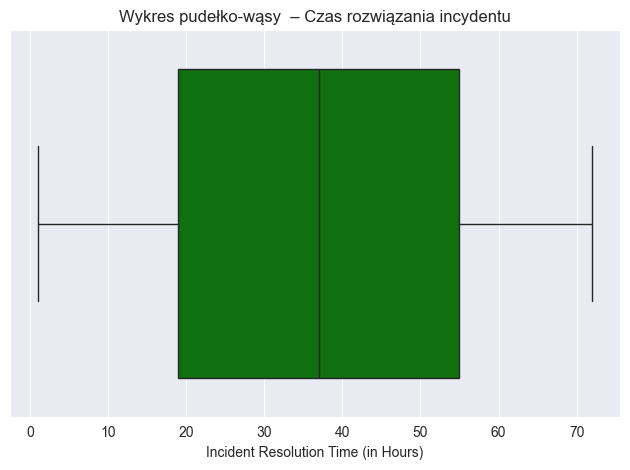

In [32]:
plt.figure()
sns.boxplot(x=df['Incident Resolution Time (in Hours)'], color='green')
plt.title("Wykres pudełko-wąsy  – Czas rozwiązania incydentu")
plt.tight_layout()
plt.show()

#### Liczba incydentów w czasie

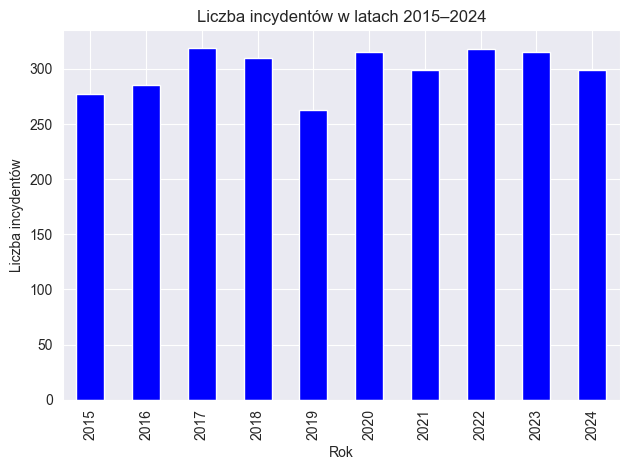

In [35]:
plt.figure()
df['Year'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title("Liczba incydentów w latach 2015–2024")
plt.xlabel("Rok")
plt.ylabel("Liczba incydentów")
plt.tight_layout()
plt.show()

#### Trend strat finansowych w czasie

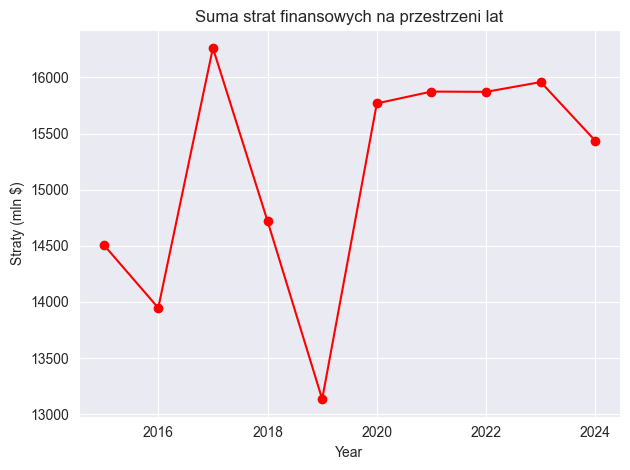

In [36]:
plt.figure()
df.groupby('Year')['Financial Loss (in Million $)'].sum().plot(marker='o', color='red')
plt.title("Suma strat finansowych na przestrzeni lat")
plt.ylabel("Straty (mln $)")
plt.tight_layout()
plt.show()

#### Korelacje między zmiennymi liczbowymi

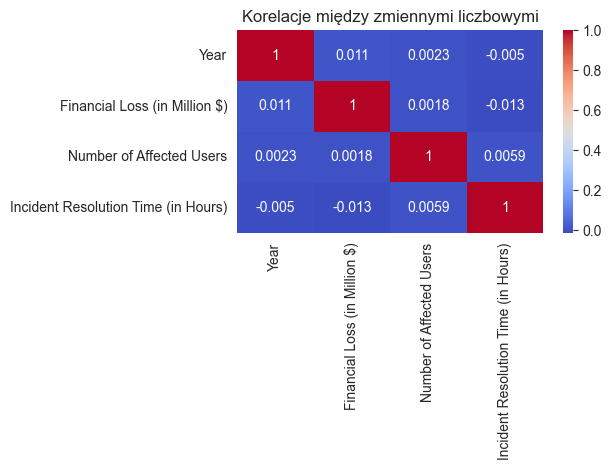

In [37]:
plt.figure()
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Korelacje między zmiennymi liczbowymi")
plt.tight_layout()
plt.show()

#### Zależność - Typ ataku a straty

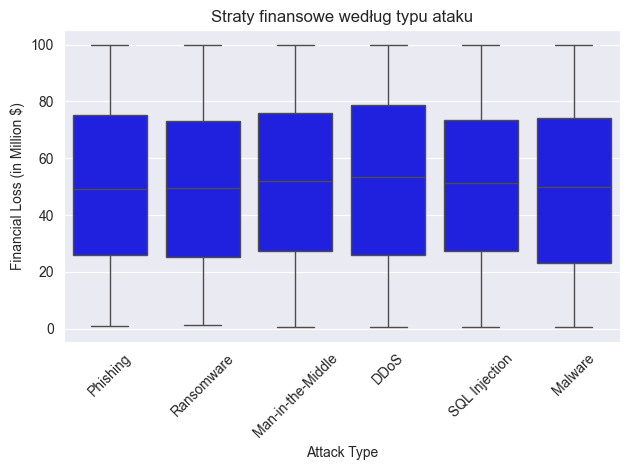

In [39]:
plt.figure()
sns.boxplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', color='blue')
plt.title("Straty finansowe według typu ataku")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analiza wielowymiarowa

#### Klasteryzacja incydentów

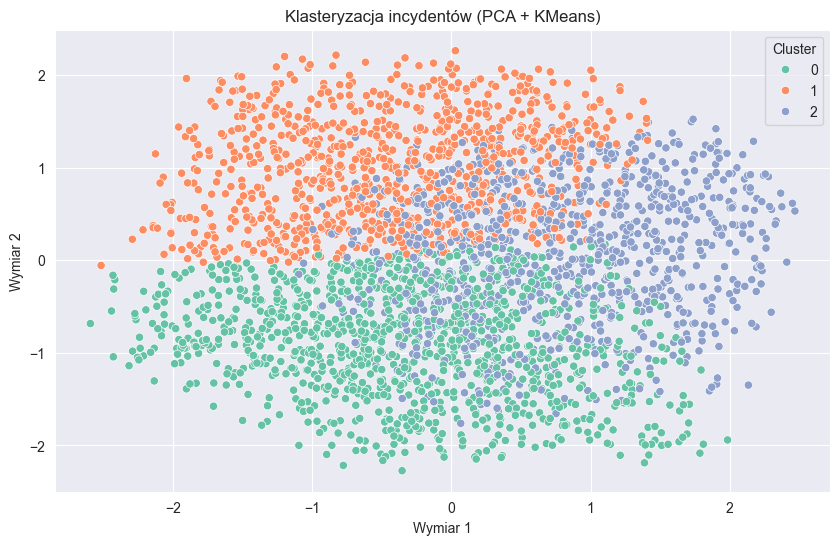

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2')
plt.title("Klasteryzacja incydentów (PCA + KMeans)")
plt.xlabel("Wymiar 1")
plt.ylabel("Wymiar 2")
plt.show()


#### Analiza cech klastrów

In [4]:
cluster_stats = df.groupby('Cluster')[['Financial Loss (in Million $)',
                                       'Number of Affected Users',
                                       'Incident Resolution Time (in Hours)']].mean()
display(cluster_stats)


,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
Cluster,,,
0,53.084522,199593.378016,36.343164
1,76.196824,706922.756150,36.340107
2,22.022516,665681.439746,36.767442


- Klaster 0: Charakteryzuje się najwyższą średnią liczbą poszkodowanych użytkowników oraz znacznymi stratami finansowymi. Może to sugerować masowe ataki o dużym zasięgu, np. naruszenia danych.

- Klaster 1: Wyróżnia się najdłuższym średnim czasem rozwiązania incydentów, co może wskazywać na ataki o wysokim poziomie skomplikowania lub niedostateczne procedury reagowania.

- Klaster 2: Ma najniższe wartości we wszystkich trzech analizowanych aspektach, co sugeruje incydenty o ograniczonym wpływie, które były stosunkowo szybko rozwiązywane.


#### Ważność cech wpływających na straty finansowe

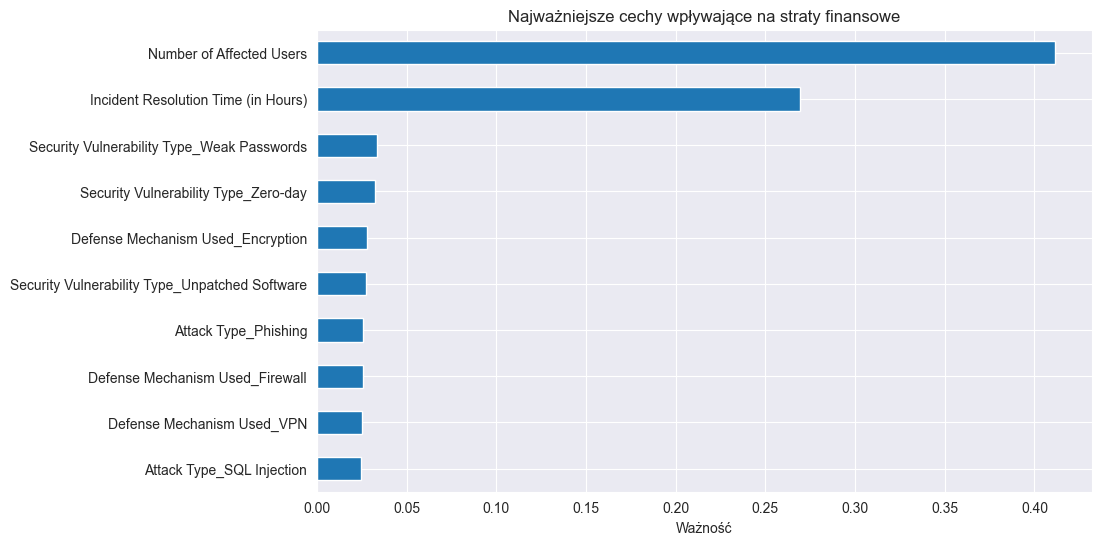

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_model = df[['Financial Loss (in Million $)',
               'Number of Affected Users',
               'Incident Resolution Time (in Hours)',
               'Attack Type',
               'Security Vulnerability Type',
               'Defense Mechanism Used']].dropna()

df_model = pd.get_dummies(df_model, drop_first=True)

X = df_model.drop('Financial Loss (in Million $)', axis=1)
y = df_model['Financial Loss (in Million $)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='barh')
plt.title("Najważniejsze cechy wpływające na straty finansowe")
plt.xlabel("Ważność")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

- **Liczba poszkodowanych użytkowników** oraz **czas rozwiązania incydentu (w godzinach)** to najważniejsze czynniki wpływające na wysokość strat finansowych. Im więcej użytkowników zostało dotkniętych incydentem i im dłużej trwało jego rozwiązanie, tym większe były koszty.
- Znaczenie mają również konkretne **rodzaje luk w zabezpieczeniach**, takie jak:
  - *Słabe hasła*,
  - *Ataki typu zero-day*,
  - *Niezałatane oprogramowanie*.
- Również obecność lub brak określonych **mechanizmów obronnych** wpływa na skalę strat. Przykładowo:
  - *Szyfrowanie danych*,
  - *Zapory sieciowe (firewall)*,
  - *Wirtualna sieć prywatna (VPN)*.
- Wśród typów ataków zauważalne znaczenie mają:
  - *Phishing*,
  - *SQL Injection*.